<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Demo 5.3 
# *Support Vector Machines*

SVMs use linear algebra to find an (n-1)-dimensional boundary that separates classes within an n-dimensional space. In practical terms, this technique provides a conceptually simple way to predict class membership from a set of features. 

The standard (linear) SVM is immediately applicable to linear classification problems. Furthermore, by applying transformations to the feature space it is possible to tackle nonlinear classification problems. These transforms are called *kernels*.

In [170]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

%matplotlib inline

## Linear SVM

Here we will apply a linear kernal to separate two clusters in 2D. This means our solution hyperplane will be a straight line in the x-y plane.  

We will use the `SVC` (support vector classification) algorithm from the `svm` library.

Scikit-learn has a handy function for generating synthetic data in clusters:

In [171]:
# Create 40 separable points:
X, y = make_blobs(n_samples=40, centers=2, random_state=6)

In [172]:
X.shape, y.shape

((40, 2), (40,))

In [173]:
print(X[:4,0], X[:4,1], y[:4])

[6.37734541 6.50072722 4.29225906 7.39169472] [-10.61510727  -3.82403586  -8.99220442  -3.1266933 ] [1 0 1 0]


X is a 2-column matrix representing 40 (x,y) pairs and y is the cluster membership vector.

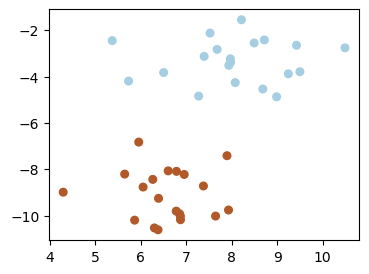

In [174]:
plt.figure(figsize=(4,3))
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired);  # cmap is the colour map for c

* Linear Kernel is used when the data is linearly separable, i.e. it can be separated using a single line

**What is a Kernel method in machine learning?** 

Kernel methods are types of algorithms that are used for pattern analysis. These methods involve using linear classifiers to solve nonlinear problems. Essentially, kernel methods are algorithms that make it possible to implicitly project the data in a high-dimensional space.

Like many Scikit-learn algorithms, svm.SVC applies regularisation by default. For this demo, we will train the model with regularisation suppressed:

In [175]:
# fit the model, without regularisation (make C large):
clf = svm.SVC(kernel = 'linear', C = 1000)
clf.fit(X, y)

SVC(C=1000, kernel='linear')

In [176]:
# coordinates of support vectors
clf.support_vectors_

array([[ 7.27059007, -4.84225716],
       [ 5.95313618, -6.82945967],
       [ 7.89359985, -7.41655113]])

In [177]:
clf.classes_

array([0, 1])

In [178]:
# svm does not give prob by default
# set probability to True
clf = svm.SVC(kernel = 'linear', C = 1000, probability = True)
clf.fit(X, y)

SVC(C=1000, kernel='linear', probability=True)

This will plot the data with the solution hyperplane and dividing boundaries superimposed. Make sure to look up any methods you aren't familiar with and add some comments to explain what they are doing.

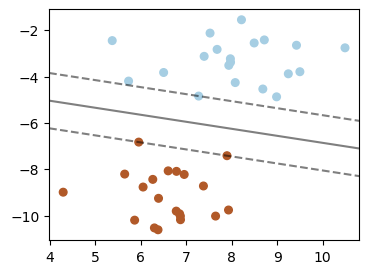

In [179]:
plt.figure(figsize=(4,3))
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors = 'k', levels = [-1, 0, 1], alpha = 0.5, linestyles = ['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s = 100, linewidth = 1, facecolors = 'none');

### Nonlinear SVM

Here we will apply a nonlinear kernel to separate two classes where a linear kernel would fail. For this we will use the `NuSVC` algorithm from the `svm` library.

Generating this dataset relies on a logical trick to classify the points by which quadrant they are in:

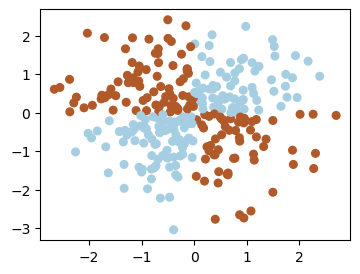

In [180]:
np.random.seed(0)
X = np.random.randn(300, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
plt.figure(figsize=(4,3))
plt.scatter(X[:, 0], X[:, 1], c = y, s = 30, cmap = plt.cm.Paired);

For this demo we will train the model using default parameters, so we instantiate an `svm.NuSVC` with no arguments:

In [181]:
# fit the model
clf = svm.NuSVC()
clf.fit(X, y)

NuSVC()

The next visualisation requires some tricky coding. The `svm.NuSVC` class has a `decision_function` method that we can use to create a heatmap to show how the likelihood of class membership varies over the 2D feature space. The Numpy `meshgrid` function is useful for creating our 2D spatial grid, but the `decision_function` method need the the grid to be passed as a 2D array with x-values in the 1st column and y-values in the second:

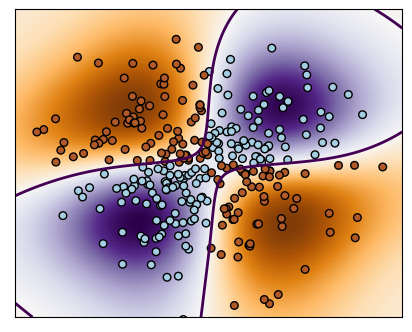

In [182]:
# Plot the decision function for each datapoint on the grid ...
plt.figure(figsize=(5,4))

# create a fine grid on which to calculate the function:
xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))

# use ravel() to transform each array into 1 contiguous vector (row-wise or column-wise);
# then use c_[] to create an array with one column for each or these two vectors;
# then apply the decision_function() to compute the distance of each sample X to the separating hyperplane:
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])  

# finally, change the shape of the result back into that of the original grid:
Z = Z.reshape(xx.shape)  # put results back into original geometry

# plot Z as a heatmap:
plt.imshow(Z, interpolation = 'nearest',
           extent = (xx.min(), xx.max(), yy.min(), yy.max()), aspect = 'auto',
           origin = 'lower', cmap = plt.cm.PuOr_r)

# plot decision boundaries:
contours = plt.contour(xx, yy, Z, levels = [0], linewidths = 2, linestyles = '-')

# plot original data points:
plt.scatter(X[:, 0], X[:, 1], s = 30, c = y, cmap = plt.cm.Paired, edgecolors = 'k')

# scaling, final rendering:
plt.xticks(()); plt.yticks(()); plt.axis([-3, 3, -3, 3]);

In [183]:
# Number of support vectors
len(clf.support_vectors_)

154

### Bonus: Nonlinear SVM

In [184]:
# Generate synthetic samples
np.random.seed(42)
X = np.random.randn(300, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

In [185]:
X[:5]

array([[ 0.49671415, -0.1382643 ],
       [ 0.64768854,  1.52302986],
       [-0.23415337, -0.23413696],
       [ 1.57921282,  0.76743473],
       [-0.46947439,  0.54256004]])

In [186]:
y[:5]

array([ True, False, False, False,  True])

In [187]:
y = y * 1
y[:5]

array([1, 0, 0, 0, 1])

In [188]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [189]:
# Build model using NuSVC
clf = svm.NuSVC(kernel='rbf', probability=True, random_state=42)

In [190]:
# Build model using SVC w/ kernel 'rbf'
# clf = svm.SVC(C=1, kernel='rbf', probability=True, random_state=42)

In [191]:
# Train model
clf.fit(X_train, y_train)

NuSVC(probability=True, random_state=42)

In [192]:
# Predict target
y_pred_test = clf.predict(X_test)

In [193]:
# Confusion matrix
print(metrics.confusion_matrix(y_test, y_pred_test))

[[42  8]
 [ 0 40]]


In [194]:
# Classification report
print(metrics.classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91        50
           1       0.83      1.00      0.91        40

    accuracy                           0.91        90
   macro avg       0.92      0.92      0.91        90
weighted avg       0.93      0.91      0.91        90



In [195]:
# Number of support vectors
len(clf.support_vectors_)

110

In [196]:
# Support vectors
clf.support_vectors_[:5]

array([[-0.78325329, -0.32206152],
       [-0.01349722, -1.05771093],
       [-0.10703036, -1.03524232],
       [ 0.22409248,  0.0125924 ],
       [ 0.11351735,  0.66213067]])

In [197]:
def plot_roc_curve(model, X_test, y_test):
    """
    Function to plot roc curve
    """
    # Generate prediction probabilities for each of the test observations using predict_proba() function rather than just predict
    logreg = model
    preds = logreg.predict_proba(X_test)[:,1]
    
    # Store the false positive rate (fpr), true positive rate (tpr) in vectors for use in the graph
    fpr, tpr, _ = metrics.roc_curve(y_test, preds) #_: threshold
    
    # Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
    roc_auc = metrics.auc(fpr, tpr)

    # Plot the ROC Curve
    plt.figure(figsize=(5,4))
    lw = 2 # line width
    plt.plot(fpr, tpr, color = 'darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate (1-specificity)')
    plt.ylabel('True Positive Rate (sensitivity)')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right");    

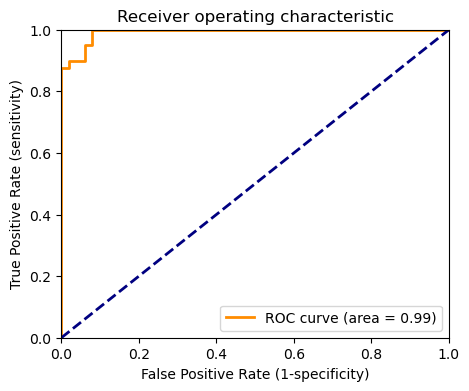

In [198]:
# Plot ROC curve
plot_roc_curve(clf, X_test, y_test)

In [203]:
# Cross validation
scores = cross_val_score(clf, X_train, y_train, cv=5)
scores

array([0.88095238, 0.95238095, 0.92857143, 0.95238095, 0.88095238])

In [204]:
print(f"{scores.mean():.3f} mean accuracy with a standard deviation of {scores.std():.3f}")

0.919 mean accuracy with a standard deviation of 0.032


* Superb model performance kind of expected given that the data was generated synthetically

## === End ===



---



---



> > > > > > > > > © 2022 Institute of Data


---



---



